Install and Import Different Libraries

In [36]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install scikit-learn
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv('epl_player_stats_24_25.csv')

# Add team rankings based on real-life standings
team_rankings = {
   'Liverpool': 1,
    'Arsenal': 2,
    'Manchester City': 3,
    'Chelsea': 4,
    'Newcastle United': 5,
    'Aston Villa': 6,
    'Nottingham Forest': 7,
    'Brighton & Hove Albion': 8,
    'Bournemouth': 9,
    'Brentford': 10,
    'Fulham': 11,
    'Crystal Palace': 12,
    'Everton': 13,
    'West Ham United': 14,
    'Manchester United': 15,
    'Wolverhampton Wanderers': 16,
    'Tottenham Hotspur': 17,
    'Leicester City': 18,
    'Ipswich Town': 19,
    'Southampton': 20,
}

# Order clubs by their rankings
data['Club'] = pd.Categorical(data['Club'], categories=sorted(team_rankings, key=team_rankings.get), ordered=True)
# Create a new column for club rankings
data['Team_Rank'] = data['Club'].map(team_rankings)

Basic Visualization of the data

C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\3178561822.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Position', data=data, palette='pastel')


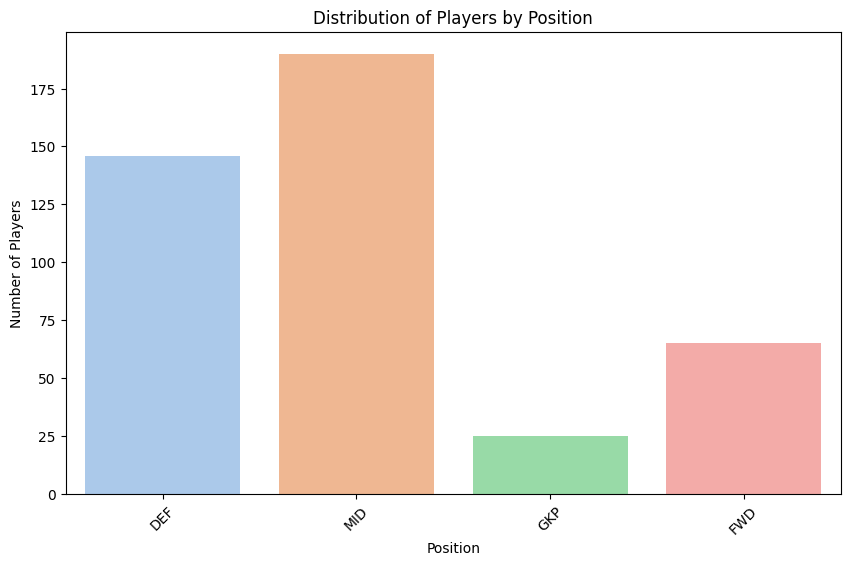

  Position  Goals
0      DEF    128
1      FWD    335
2      GKP      0
3      MID    493


C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\3178561822.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Goals', data=total_goals_by_position, palette='pastel')


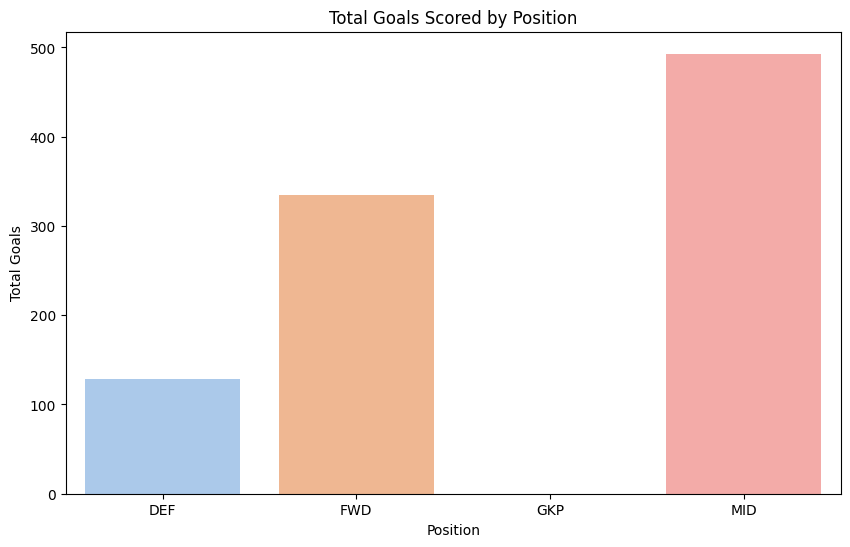

  Position  Assists
0      DEF      133
1      FWD       93
2      GKP        3
3      MID      414


C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\3178561822.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Assists', data=total_assists_by_position, palette='pastel')


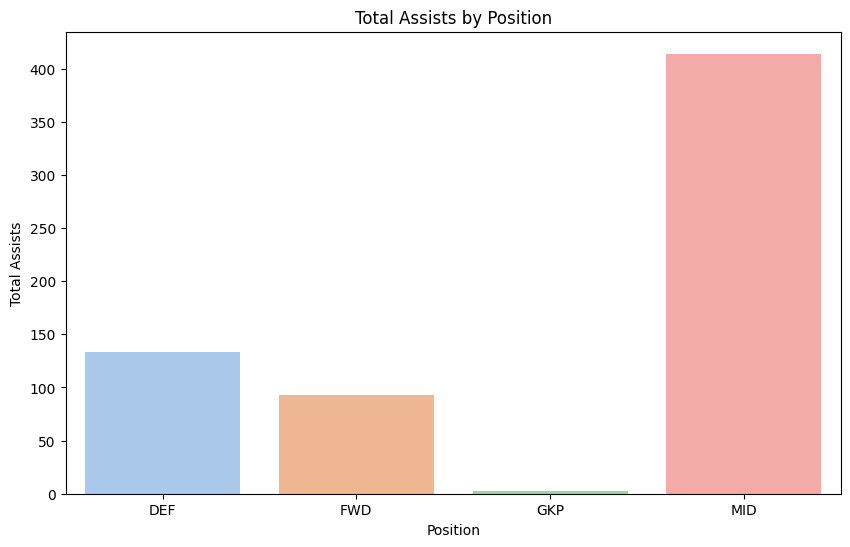

In [39]:
# If a player has played less than 10 matches, we will not consider them for the analysis
data = data[data['Appearances'] >= 10]

#Visualize different features in the dataset
#Players by Position
plt.figure(figsize=(10, 6))
sns.countplot(x='Position', data=data, palette='pastel')
plt.title('Distribution of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

#Compare Goals Scored by Position
total_goals_by_position = data.groupby('Position')['Goals'].sum().reset_index()
print(total_goals_by_position)
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Goals', data=total_goals_by_position, palette='pastel')
plt.title('Total Goals Scored by Position')
plt.xlabel('Position')
plt.ylabel('Total Goals')
plt.show()

#Compare Assists by Position
total_assists_by_position = data.groupby('Position')['Assists'].sum().reset_index()
print(total_assists_by_position)
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Assists', data=total_assists_by_position, palette='pastel')
plt.title('Total Assists by Position')
plt.xlabel('Position')
plt.ylabel('Total Assists')
plt.show()

Top Players in Main Categories

              Player Name Position  Goals
324         Mohamed Salah      FWD     29
391        Alexander Isak      FWD     23
335        Erling Haaland      FWD     22
82           Bryan Mbeumo      MID     20
417            Chris Wood      FWD     20
107           Yoane Wissa      FWD     19
46          Ollie Watkins      FWD     16
141           Cole Palmer      MID     15
548         Matheus Cunha      MID     15
180  Jean-Philippe Mateta      FWD     14


C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\879183250.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goals', y='Player Name', data=top_goalscorers, palette='coolwarm')


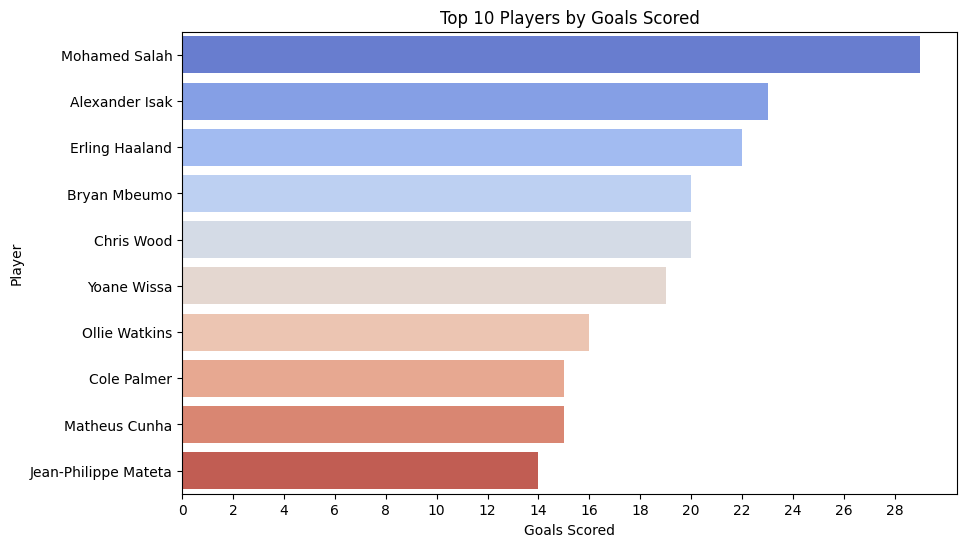

          Player Name Position  Assists
324     Mohamed Salah      FWD       18
399      Jacob Murphy      MID       12
415    Anthony Elanga      MID       11
1         Bukayo Saka      MID       10
45      Morgan Rogers      MID       10
99   Mikkel Damsgaard      MID       10
222  Antonee Robinson      DEF       10
367   Bruno Fernandes      MID       10
497     Son Heung-Min      MID        9
14    Martin Ødegaard      MID        8


C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\879183250.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assists', y='Player Name', data=top_assists, palette='coolwarm')


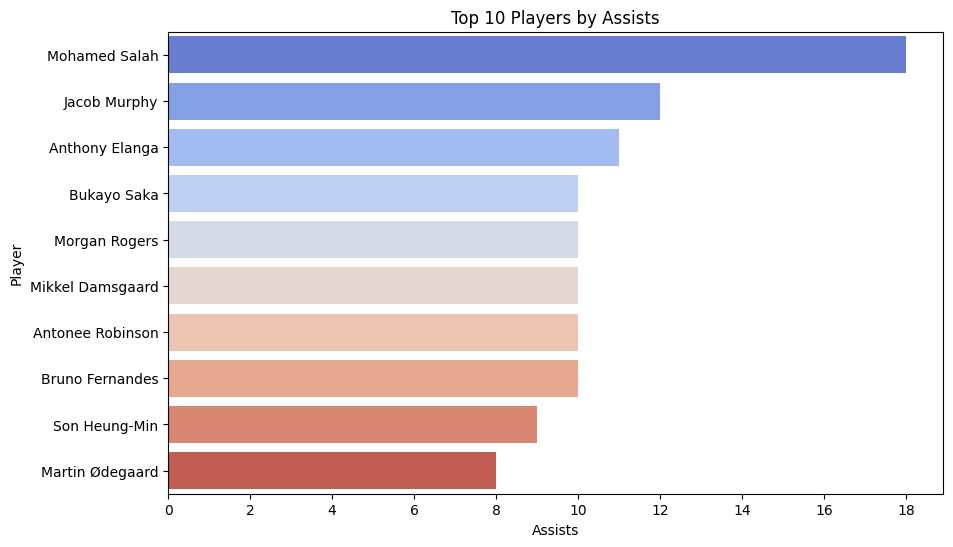

            Player Name Position  Successful Passes
301  Victor Kristiansen      DEF               2680
192         Will Hughes      MID               2409
456    Lesley Ugochukwu      MID               2328
128        Joël Veltman      DEF               2310
463        Ryan Manning      DEF               2165
449        Jan Bednarek      DEF               2004
525      Mohammed Kudus      MID               1941
416  Callum Hudson-Odoi      MID               1926
300     Stephy Mavididi      MID               1872
68           Lewis Cook      MID               1768


C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\879183250.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Successful Passes', y='Player Name', data=top_passes, palette='coolwarm')


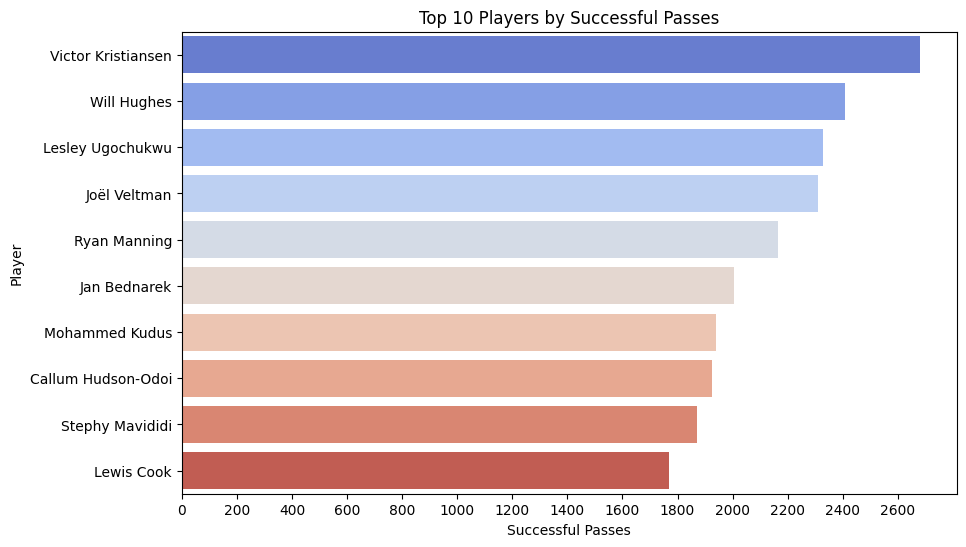

           Player Name Position  Clean Sheets
2           David Raya      GKP            13
424          Matz Sels      GKP            13
210    Jordan Pickford      GKP            12
176     Dean Henderson      GKP            11
160     Robert Sánchez      GKP            10
334            Ederson      GKP            10
307     Alisson Becker      GKP             9
364        André Onana      GKP             9
32   Emiliano Martínez      GKP             8
67                Kepa      GKP             8


C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\879183250.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clean Sheets', y='Player Name', data=top_clean_sheets, palette='Greens_r')


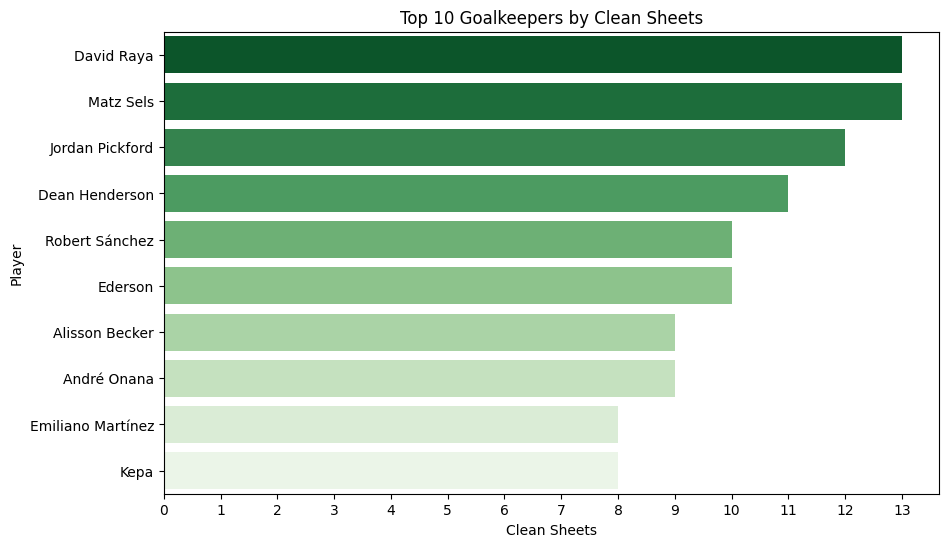

In [53]:
#Display Top 10 Players by Goals
top_goalscorers = data.nlargest(10, 'Goals')[['Player Name', 'Position', 'Goals']]
print(top_goalscorers)
plt.figure(figsize=(10, 6))
sns.barplot(x='Goals', y='Player Name', data=top_goalscorers, palette='coolwarm')
plt.title('Top 10 Players by Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Player')
plt.xticks(np.arange(0, top_goalscorers['Goals'].max() + 1, 2), rotation=0)
plt.show()

#Display Top 10 Players by Assists
top_assists = data.nlargest(10, 'Assists')[['Player Name', 'Position', 'Assists']]
print(top_assists)
plt.figure(figsize=(10, 6))
sns.barplot(x='Assists', y='Player Name', data=top_assists, palette='coolwarm')
plt.title('Top 10 Players by Assists')
plt.xlabel('Assists')
plt.ylabel('Player') 
plt.xticks(np.arange(0, top_assists['Assists'].max() + 1, 2), rotation=0)
plt.show()

#Top 10 Players Successful Passes
top_passes = data.nlargest(10, 'Successful Passes')[['Player Name', 'Position', 'Successful Passes']]
print(top_passes)
plt.figure(figsize=(10, 6))
sns.barplot(x='Successful Passes', y='Player Name', data=top_passes, palette='coolwarm')
plt.title('Top 10 Players by Successful Passes')
plt.xlabel('Successful Passes')
plt.ylabel('Player')
plt.xticks(np.arange(0, top_passes['Successful Passes'].max() + 100, 200), rotation=0)
plt.show()

#Display Top 10 Goalkeepers by Clean Sheets
gk_data = data[data['Position'] == 'GKP']
top_clean_sheets = gk_data.nlargest(10, 'Clean Sheets')[['Player Name', 'Position', 'Clean Sheets']]
print(top_clean_sheets)
plt.figure(figsize=(10, 6))
sns.barplot(x='Clean Sheets', y='Player Name', data=top_clean_sheets, palette='Greens_r')
plt.title('Top 10 Goalkeepers by Clean Sheets')
plt.xlabel('Clean Sheets')
plt.ylabel('Player')
plt.xticks(np.arange(0, top_clean_sheets['Clean Sheets'].max() + 1, 1), rotation=0)
plt.show()

Top Teams in Each Category

C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\3665886128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_goals_by_team = data.groupby('Club')['Goals'].sum().reset_index()
C:\Users\sidhu\AppData\Local\Temp\ipykernel_29632\3665886128.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Goals', y='Club', data=total_goals_by_team, palette='Purples_r')


                       Club  Goals
0                 Liverpool     72
1           Manchester City     69
2                   Arsenal     67
3          Newcastle United     66
4                   Chelsea     62
5    Brighton & Hove Albion     62
6               Aston Villa     61
7         Nottingham Forest     57
8                 Brentford     54
9         Tottenham Hotspur     50
10           Crystal Palace     48
11                   Fulham     41
12                  Everton     41
13  Wolverhampton Wanderers     39
14        Manchester United     38
15          West Ham United     31
16           Leicester City     28
17              Bournemouth     24
18             Ipswich Town     23
19              Southampton     23


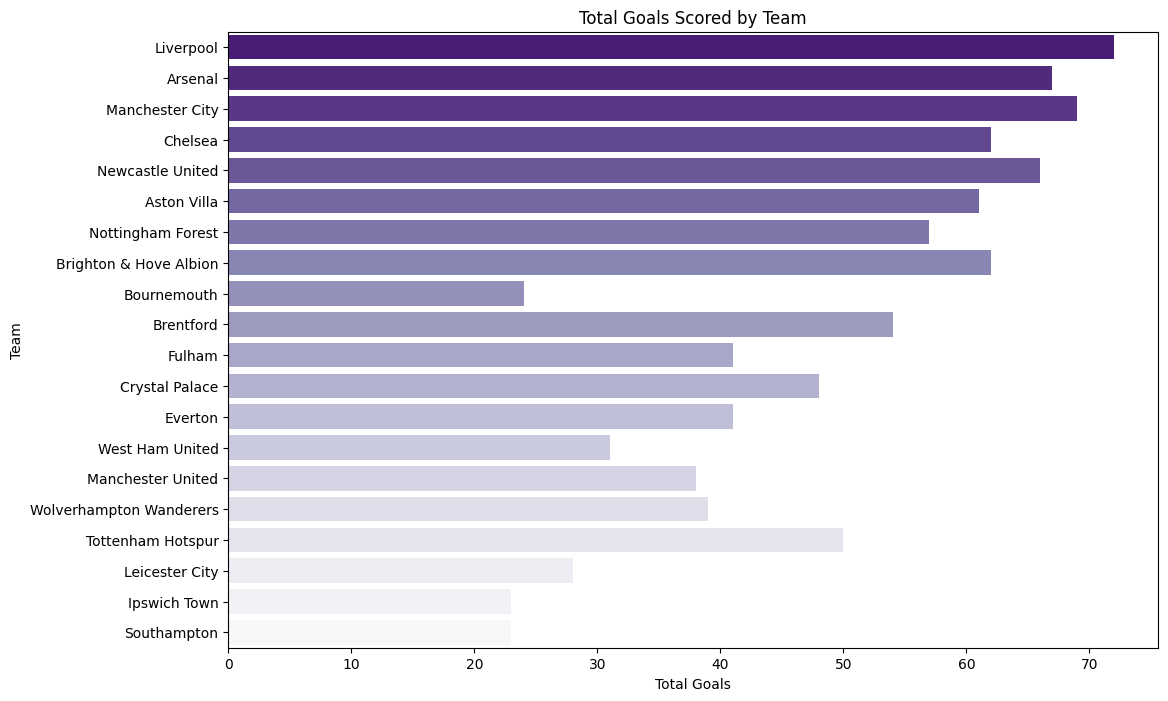

In [61]:
#Total Goals by Team
total_goals_by_team = data.groupby('Club')['Goals'].sum().reset_index()
total_goals_by_team = total_goals_by_team.sort_values(by='Goals', ascending=False)
total_goals_by_team = total_goals_by_team.reset_index(drop=True)
print(total_goals_by_team)
plt.figure(figsize=(12, 8))
plt.title('Total Goals Scored by Team')
plt.xlabel('Total Goals')
plt.ylabel('Team')
sns.barplot(x='Goals', y='Club', data=total_goals_by_team, palette='Purples_r')
plt.show()